In [1]:
import pandas as pd
import numpy as np


In [2]:
!pip install scikit-learn

In [3]:
#Model preprocessin + cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV



from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [5]:
#classification algorithms + metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [7]:
play_predictor_df = pd.read_csv('/content/drive/My Drive/Data I 0/PlayPredictor.csv')

In [20]:
play_predictor_df

,yardline_100,quarter_seconds_remaining,qtr,down,ydstogo,play_type,shotgun,no_huddle,third_down_converted,third_down_failed,pass_touchdown,rush_touchdown,return_touchdown,safety
0,30.0,900.0,1,NaN,0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,58.0,893.0,1,1.0,10,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,53.0,856.0,1,2.0,5,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,56.0,815.0,1,3.0,8,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0
4,56.0,807.0,1,4.0,8,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449366,66.0,63.0,4,2.0,10,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0
449367,66.0,58.0,4,3.0,10,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0
449368,61.0,38.0,4,4.0,5,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
449369,39.0,35.0,4,1.0,10,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
play_predictor_features = play_predictor_df.drop('play_type', axis=1)

play_predictor_target = play_predictor_df.play_type.values

In [22]:
play_predictor_features.shape

(449371, 13)

In [23]:
play_predictor_target.shape

(449371,)

In [24]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(play_predictor_features)

play_predictor_features = imp.transform(play_predictor_features)

In [25]:
play_predictor_X_train, play_predictor_X_test, play_predictor_y_train, play_predictor_y_test = train_test_split(play_predictor_features, play_predictor_target, test_size=0.3, random_state=42)

In [26]:
play_predictor_X_train.shape

(314559, 13)

In [27]:
np.any(np.isnan(play_predictor_X_train))

False

In [28]:
np.any(np.isnan(play_predictor_y_train))

False

In [43]:
rand_forest_play_predictor = RandomForestClassifier()


sgd_play_predictor = SGDClassifier()

In [44]:
rand_forest_play_predictor_steps = [('scaler', StandardScaler()), ('rand_forest_play_predictor', RandomForestClassifier())]


sgd_play_predictor_steps = [('scaler', StandardScaler()), ('sgd_play_predictor', SGDClassifier())]

In [45]:
rand_forest_play_predictor_pipeline = Pipeline(rand_forest_play_predictor_steps)


sgd_play_predictor_pipeline = Pipeline(sgd_play_predictor_steps)

In [46]:
rand_forest_play_predictor_pipeline.fit(play_predictor_X_train, play_predictor_y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rand_forest_play_predictor',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False

In [47]:
sgd_play_predictor_pipeline.fit(play_predictor_X_train, play_predictor_y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgd_play_predictor',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [48]:
rand_forest_play_predictions = rand_forest_play_predictor_pipeline.predict(play_predictor_X_test)

In [50]:
sgd_play_predictions = sgd_play_predictor_pipeline.predict(play_predictor_X_test)

In [51]:
rand_forest_play_prediction_accuracy = accuracy_score(play_predictor_y_test, rand_forest_play_predictions)



sgd_play_prediction_accuracy = accuracy_score(play_predictor_y_test, sgd_play_predictions)

In [52]:
rand_forest_play_prediction_report = classification_report(play_predictor_y_test, rand_forest_play_predictions)



sgd_play_prediction_report = classification_report(play_predictor_y_test, sgd_play_predictions)

In [53]:
print("RandomForestClassifier accuracy: {}".format(rand_forest_play_prediction_accuracy))
print()
print("RandomForestClassifier classification report")
print()
print(rand_forest_play_prediction_report)


print()
print()



print("SGDClassifier accuracy: {}".format(sgd_play_prediction_accuracy))
print()
print("SGDClassifier classification report")
print()
print(sgd_play_prediction_report)


RandomForestClassifier accuracy: 0.7080972020294929

RandomForestClassifier classification report

              precision    recall  f1-score   support

           0       0.69      0.74      0.71     55945
           1       0.59      0.57      0.58     39956
           2       0.72      0.54      0.62     12793
           3       0.97      0.98      0.97      7668
           4       0.92      0.98      0.95      7133
           5       0.88      0.91      0.90      3286
           6       0.88      0.93      0.90      2892
           7       0.69      0.76      0.72      1099
           8       0.46      0.31      0.37       208
           9       0.98      0.96      0.97      3832

    accuracy                           0.71    134812
   macro avg       0.78      0.77      0.77    134812
weighted avg       0.71      0.71      0.71    134812



SGDClassifier accuracy: 0.666305670118387

SGDClassifier classification report

              precision    recall  f1-score   support

     

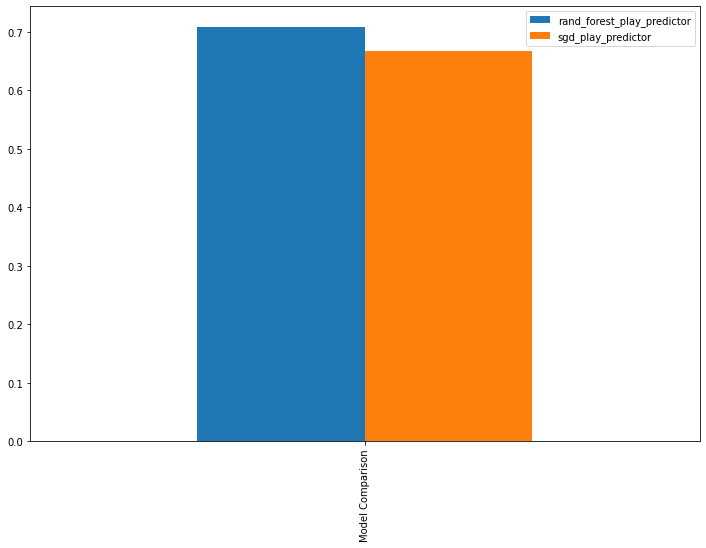

In [54]:
comparison = {'rand_forest_play_predictor':rand_forest_play_prediction_accuracy, 
            'sgd_play_predictor':sgd_play_prediction_accuracy}

compare_metrics = pd.DataFrame(data=comparison, index=['Model Comparison'])

compare_metrics.plot.bar(figsize=(12,8))


In [55]:
predictive_features_df = pd.DataFrame(play_predictor_features)

In [56]:
results_df = pd.DataFrame({"Actual_Play_Type":play_predictor_y_test, "Predicted_Play_Type":rand_forest_play_predictions})

In [57]:
results_df

,Actual_Play_Type,Predicted_Play_Type
0,1,0
1,0,1
2,0,0
3,1,1
4,0,0
...,...,...
134807,1,1
134808,5,5
134809,0,2
134810,3,3


In [58]:
results_df['Actual_Play_Type'] = results_df.Actual_Play_Type.apply(lambda row: 
                                                 'pass' if row == 0 
                                                 else 'run' if row == 1 
                                                 else 'no_play' if row == 2
                                                 else 'kickoff' if row == 3 
                                                 else 'punt' if row == 4 
                                                 else 'extra_point' if row == 5
                                                 else 'field_goal' if row == 6
                                                 else 'qb_kneel' if row == 7
                                                 else 'qb_spike' if row == 8
                                                 else 9)


In [59]:
results_df['Predicted_Play_Type'] = results_df.Predicted_Play_Type.apply(lambda row: 
                                                 'pass' if row == 0 
                                                 else 'run' if row == 1 
                                                 else 'no_play' if row == 2
                                                 else 'kickoff' if row == 3 
                                                 else 'punt' if row == 4 
                                                 else 'extra_point' if row == 5
                                                 else 'field_goal' if row == 6
                                                 else 'qb_kneel' if row == 7
                                                 else 'qb_spike' if row == 8
                                                 else 9)

In [60]:
results_df

,Actual_Play_Type,Predicted_Play_Type
0,run,pass
1,pass,run
2,pass,pass
3,run,run
4,pass,pass
...,...,...
134807,run,run
134808,extra_point,extra_point
134809,pass,no_play
134810,kickoff,kickoff


In [12]:

mlp_play_predictor = MLPClassifier()

gb_play_predictor = GradientBoostingClassifier()


In [13]:
mlp_play_predictor_steps = [('scaler', StandardScaler()), ('mlp_play_predictor', MLPClassifier())]

gb_play_predictor_steps = [('scaler', StandardScaler()), ('gb_play_predictor', GradientBoostingClassifier())]

In [18]:
mlp_play_predictor_pipeline = Pipeline(mlp_play_predictor_steps)

gb_play_predictor_pipeline = Pipeline(gb_play_predictor_steps)

In [29]:
mlp_play_predictor_pipeline.fit(play_predictor_X_train, play_predictor_y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp_play_predictor',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)

In [30]:
gb_play_predictor_pipeline.fit(play_predictor_X_train, play_predictor_y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gb_play_predictor',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
    

In [32]:
mlp_play_predictions = mlp_play_predictor_pipeline.predict(play_predictor_X_test)

In [33]:
gb_play_predictions = gb_play_predictor_pipeline.predict(play_predictor_X_test)

In [34]:
mlp_play_predictor_accuracy = accuracy_score(play_predictor_y_test, mlp_play_predictions)

gb_play_predictor_accuracy = accuracy_score(play_predictor_y_test, gb_play_predictions)

In [35]:
mlp_play_predictor_report = classification_report(play_predictor_y_test, mlp_play_predictions)

gb_play_predictor_report = classification_report(play_predictor_y_test, gb_play_predictions)

In [41]:
print("Multilayer Perceptron Classifier accuracy: {}".format(mlp_play_predictor_accuracy))
print()
print("Classification report for Multilayer Perceptron Classifier: ")
print(mlp_play_predictor_report)


print()
print()
print()

print("Gradient Boost Classifier accuracy: {}".format(gb_play_predictor_accuracy))
print()
print("Classification report for Gradient Boost Classifier: ")
print(gb_play_predictor_report)





Multilayer Perceptron Classifier accuracy: 0.7462095362430644

Classification report for Multilayer Perceptron Classifier: 
              precision    recall  f1-score   support

           0       0.74      0.76      0.75     55945
           1       0.64      0.67      0.65     39956
           2       0.93      0.48      0.63     12793
           3       0.92      0.96      0.94      7668
           4       0.92      0.99      0.95      7133
           5       0.84      0.98      0.90      3286
           6       0.84      0.97      0.90      2892
           7       0.67      0.83      0.74      1099
           8       0.65      0.26      0.38       208
           9       0.95      0.96      0.95      3832

    accuracy                           0.75    134812
   macro avg       0.81      0.78      0.78    134812
weighted avg       0.75      0.75      0.74    134812




Gradient Boost Classifier accuracy: 0.7512461798652939

Classification report for Gradient Boost Classifier: 
    

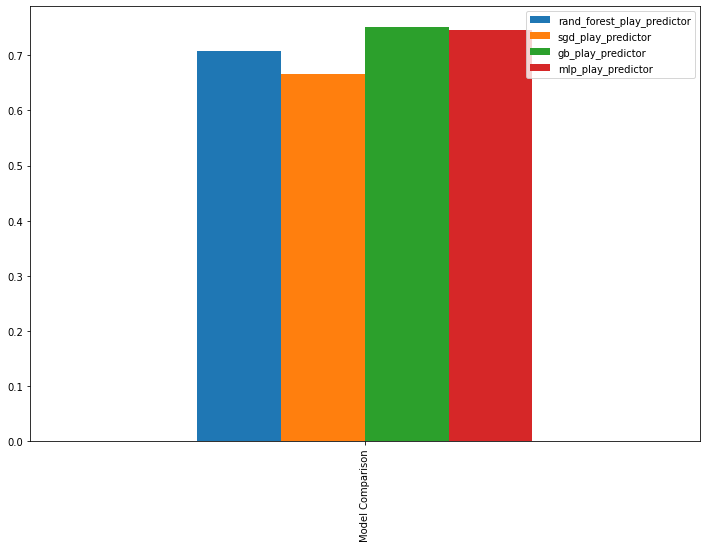

In [61]:
comparison = {'rand_forest_play_predictor':rand_forest_play_prediction_accuracy, 
            'sgd_play_predictor':sgd_play_prediction_accuracy, 'gb_play_predictor':gb_play_predictor_accuracy, 'mlp_play_predictor':mlp_play_predictor_accuracy}

compare_metrics = pd.DataFrame(data=comparison, index=['Model Comparison'])

compare_metrics.plot.bar(figsize=(12,8))

In [108]:
total_model_df = pd.DataFrame({'Actual_Play_Type':play_predictor_y_test, 'Gradient_Boost_Classifier':gb_play_predictions, 'Multi_Layer_Perceptron_Classifier':mlp_play_predictions, 'Random_Forest_Classifier':rand_forest_play_predictions, 'Stochastic_Gradient_Descent_Classifier':sgd_play_predictions})

In [109]:
total_model_df

,Actual_Play_Type,Gradient_Boost_Classifier,Multi_Layer_Perceptron_Classifier,Random_Forest_Classifier,Stochastic_Gradient_Descent_Classifier
0,1,1,0,0,1
1,0,0,0,1,0
2,0,0,0,0,0
3,1,1,1,1,1
4,0,1,1,0,1
...,...,...,...,...,...
134807,1,1,1,1,1
134808,5,5,5,5,5
134809,0,1,1,2,1
134810,3,3,3,3,3


In [110]:
total_model_df['Actual_Play_Type'] = total_model_df.Actual_Play_Type.apply(lambda row: 
                                                 'pass' if row == 0 
                                                 else 'run' if row == 1 
                                                 else 'no_play' if row == 2
                                                 else 'kickoff' if row == 3 
                                                 else 'punt' if row == 4 
                                                 else 'extra_point' if row == 5
                                                 else 'field_goal' if row == 6
                                                 else 'qb_kneel' if row == 7
                                                 else 'qb_spike' if row == 8
                                                 else 9)

In [111]:
total_model_df['Gradient_Boost_Classifier'] = total_model_df.Gradient_Boost_Classifier.apply(lambda row: 
                                                 'pass' if row == 0 
                                                 else 'run' if row == 1 
                                                 else 'no_play' if row == 2
                                                 else 'kickoff' if row == 3 
                                                 else 'punt' if row == 4 
                                                 else 'extra_point' if row == 5
                                                 else 'field_goal' if row == 6
                                                 else 'qb_kneel' if row == 7
                                                 else 'qb_spike' if row == 8
                                                 else 9)

In [112]:
total_model_df['Multi_Layer_Perceptron_Classifier'] = total_model_df.Multi_Layer_Perceptron_Classifier.apply(lambda row: 
                                                 'pass' if row == 0 
                                                 else 'run' if row == 1 
                                                 else 'no_play' if row == 2
                                                 else 'kickoff' if row == 3 
                                                 else 'punt' if row == 4 
                                                 else 'extra_point' if row == 5
                                                 else 'field_goal' if row == 6
                                                 else 'qb_kneel' if row == 7
                                                 else 'qb_spike' if row == 8
                                                 else 9)

In [113]:
total_model_df['Random_Forest_Classifier'] = total_model_df.Random_Forest_Classifier.apply(lambda row: 
                                                 'pass' if row == 0 
                                                 else 'run' if row == 1 
                                                 else 'no_play' if row == 2
                                                 else 'kickoff' if row == 3 
                                                 else 'punt' if row == 4 
                                                 else 'extra_point' if row == 5
                                                 else 'field_goal' if row == 6
                                                 else 'qb_kneel' if row == 7
                                                 else 'qb_spike' if row == 8
                                                 else 9)

In [114]:
total_model_df['Stochastic_Gradient_Descent_Classifier'] = total_model_df.Stochastic_Gradient_Descent_Classifier.apply(lambda row: 
                                                 'pass' if row == 0 
                                                 else 'run' if row == 1 
                                                 else 'no_play' if row == 2
                                                 else 'kickoff' if row == 3 
                                                 else 'punt' if row == 4 
                                                 else 'extra_point' if row == 5
                                                 else 'field_goal' if row == 6
                                                 else 'qb_kneel' if row == 7
                                                 else 'qb_spike' if row == 8
                                                 else 9)

In [115]:
total_model_df

,Actual_Play_Type,Gradient_Boost_Classifier,Multi_Layer_Perceptron_Classifier,Random_Forest_Classifier,Stochastic_Gradient_Descent_Classifier
0,run,run,pass,pass,run
1,pass,pass,pass,run,pass
2,pass,pass,pass,pass,pass
3,run,run,run,run,run
4,pass,run,run,pass,run
...,...,...,...,...,...
134807,run,run,run,run,run
134808,extra_point,extra_point,extra_point,extra_point,extra_point
134809,pass,run,run,no_play,run
134810,kickoff,kickoff,kickoff,kickoff,kickoff


In [101]:
model_accuracy = pd.DataFrame({'Gradient_Boost_Classifier':gb_play_predictor_accuracy, 'Multi_Layer_Perceptron_Classifier':mlp_play_predictor_accuracy, 'Random_Forest_Classifier':rand_forest_play_prediction_accuracy, 'Stochastic_Gradient_Descent_Classifier':sgd_play_prediction_accuracy}, index=['Model Accuracy Comparison'])

In [102]:
model_accuracy

,Gradient_Boost_Classifier,Multi_Layer_Perceptron_Classifier,Random_Forest_Classifier,Stochastic_Gradient_Descent_Classifier
Model Accuracy Comparison,0.751246,0.74621,0.708097,0.666306


In [100]:
#Best Model: Gradient Boost Classifier

#This should not come as a surprise, as it is built to be a very efficient implementation of the decision tree, as its training speeds are faster and can handle
#large amounts of data.



In [ ]:
#DUE TO TIME CONSTRAINTS I DID NOT GET TO HYPERPARAMETER TUNING AND CROSS VALIDATION OF THE MODEL